# Sales prediction of Different iteams by Advertising data (Task-5) by LalithMadhav Sudileti

In [1]:
#Importing Libraries for doing Task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
adds=pd.read_csv('Advertising data set.csv')
adds

,S.NO,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
adds.head()

,S.NO,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
adds.tail()

,S.NO,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
adds.columns

Index(['S.NO', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
adds.drop('S.NO',axis='columns',inplace=True)

In [7]:
adds

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
adds.shape

(200, 4)

In [9]:
adds.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
adds.duplicated().sum()

0

# Exploratory Data Analysis

In [11]:
adds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
adds.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
# Covariance of the advertising data
covariance=adds.cov()
covariance

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [14]:
# Correlation of the Advertising data of sales between them
correlation=adds.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [15]:
#Skewness of the advretisind data of sales
skewness=adds.skew()
skewness

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [16]:
adds.sum()

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         2804.5
dtype: float64

# Data Visualization

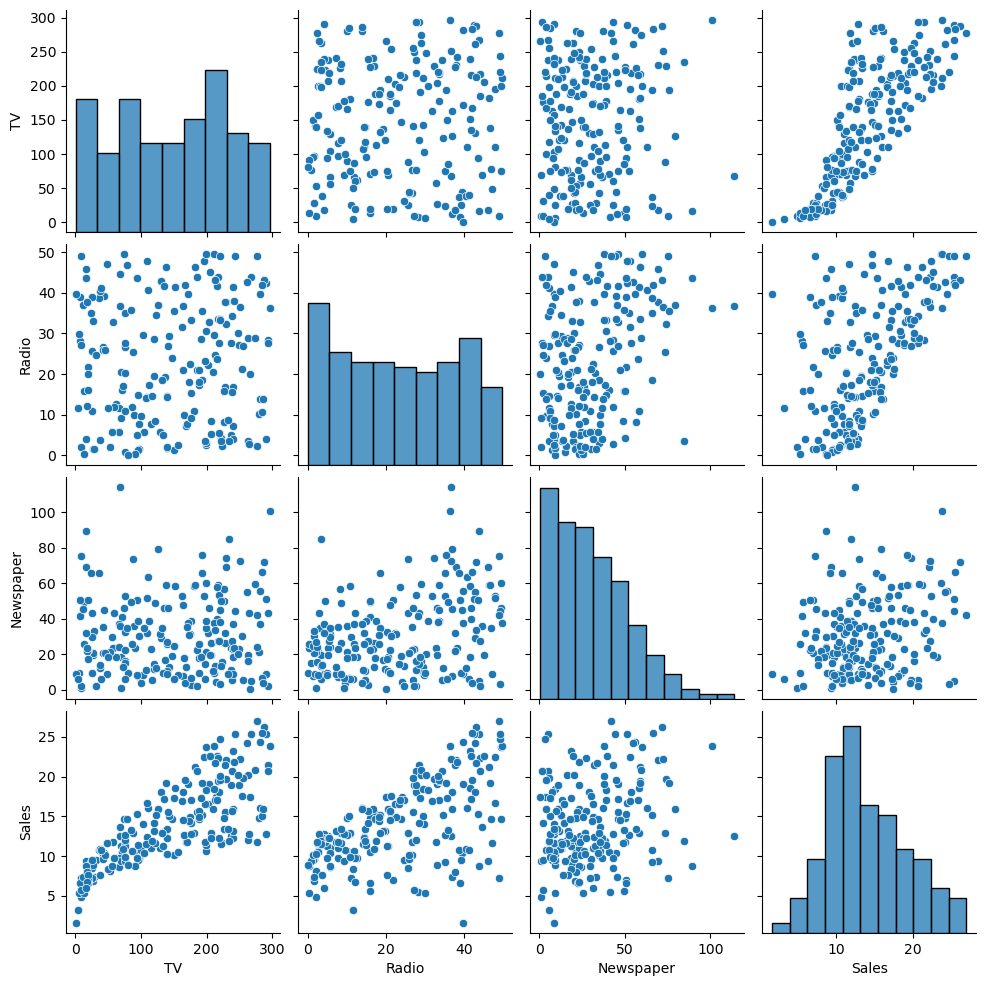

In [17]:
#Pair plot to the Advertising data
sns.pairplot(adds)
plt.show()

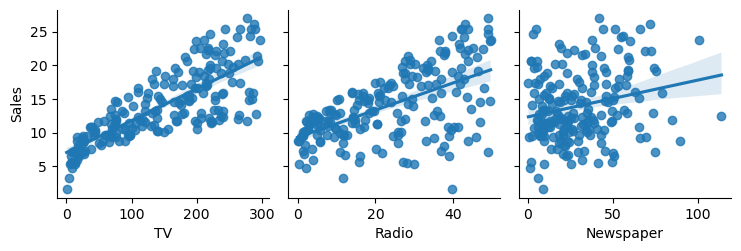

In [18]:
sns.pairplot(adds,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='reg')
plt.show()

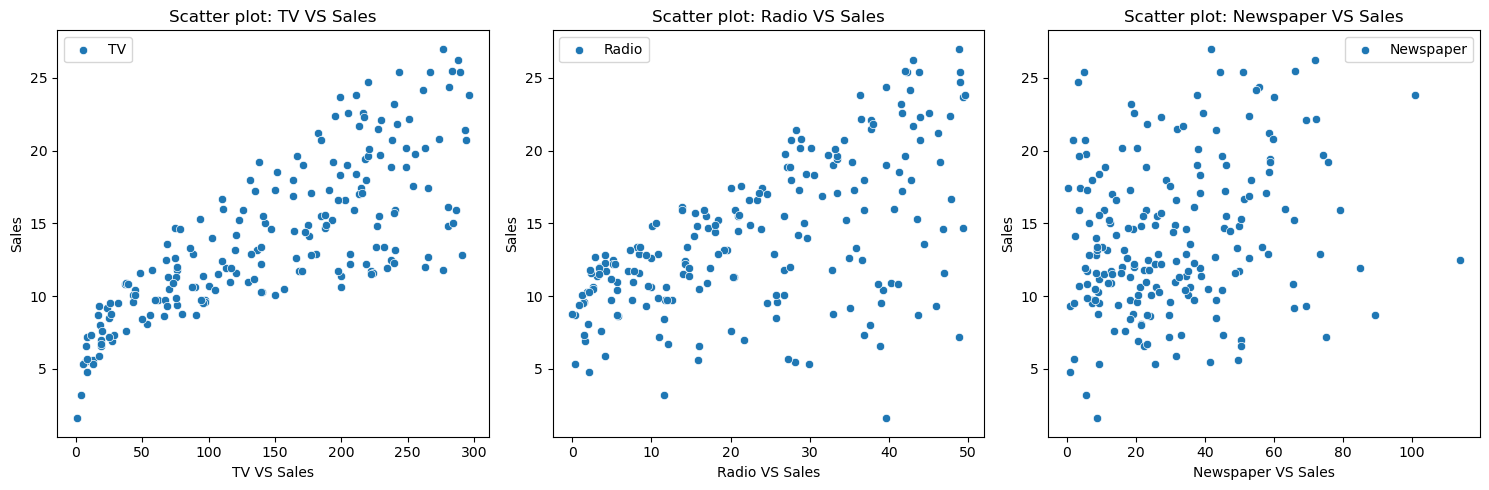

In [19]:
#Scatter plot for Advertising data
plt.figure(figsize=(15, 5))
columns = {0: "TV", 1: "Radio", 2: "Newspaper"}
for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=adds[col_name],y=adds["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()
plt.tight_layout()
plt.show()

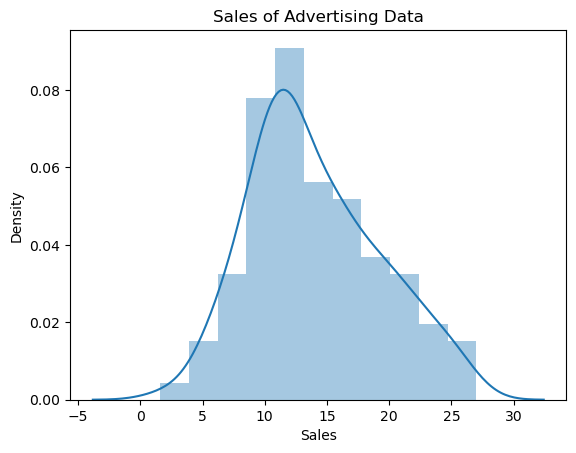

In [20]:
#Distplot for the Advertising data of sales

sns.distplot(adds['Sales'])
plt.title('Sales of Advertising Data')
plt.show()

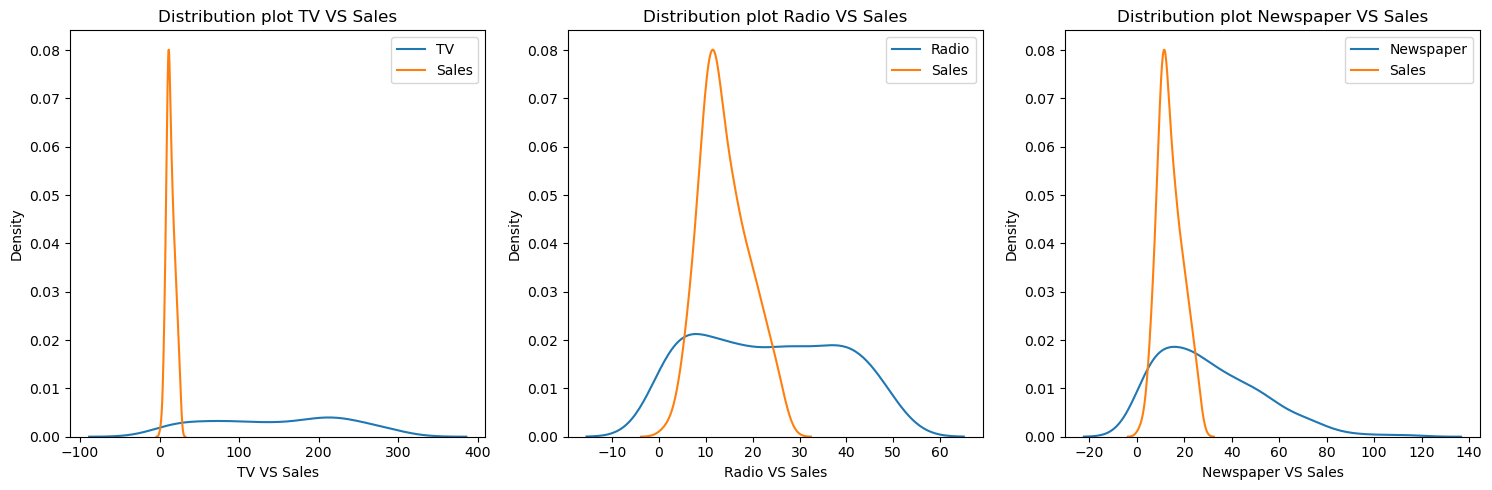

In [21]:
# Distplot of advertising data of (TV,Radio,Newspaper,)

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=adds[col_name],hist=False, label= col_name)
    sns.distplot(x=adds["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

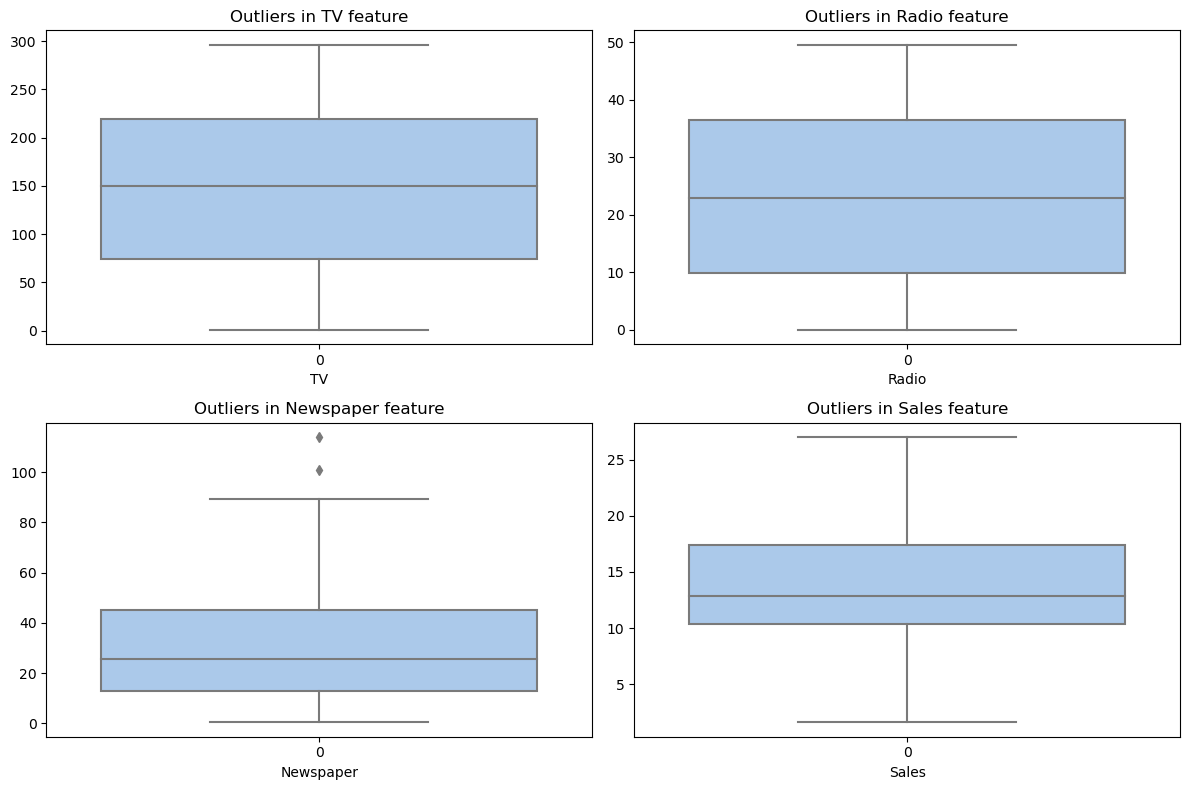

In [22]:
# Box plot of Advertising data
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=adds[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

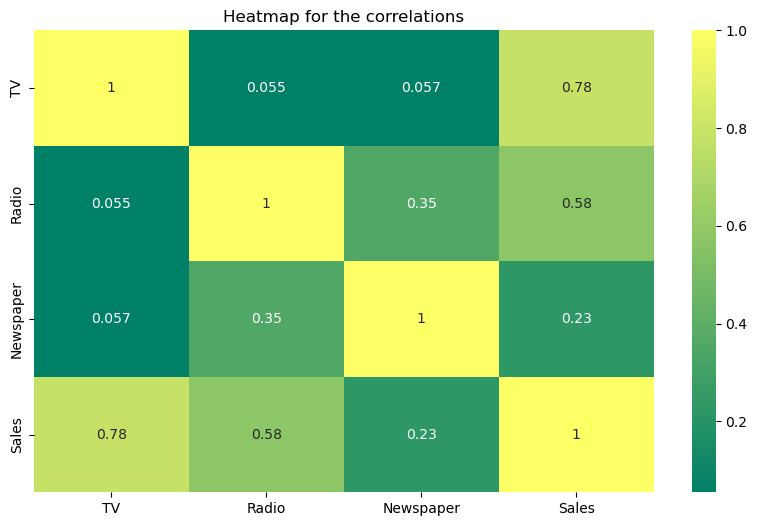

In [23]:
#Heatmap of correlation data by Advertising data
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()

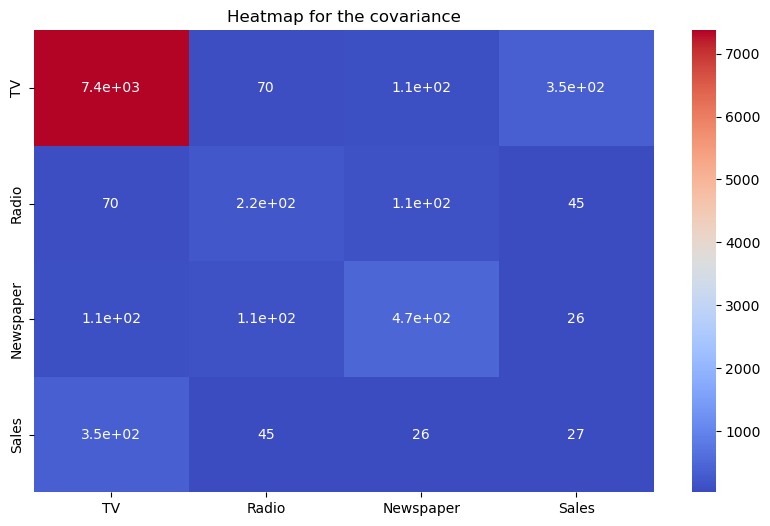

In [24]:
#Heatmap by covariance data
plt.figure(figsize=(10,6))
sns.heatmap(covariance,annot=True,cmap='coolwarm')
plt.title("Heatmap for the covariance")
plt.show()

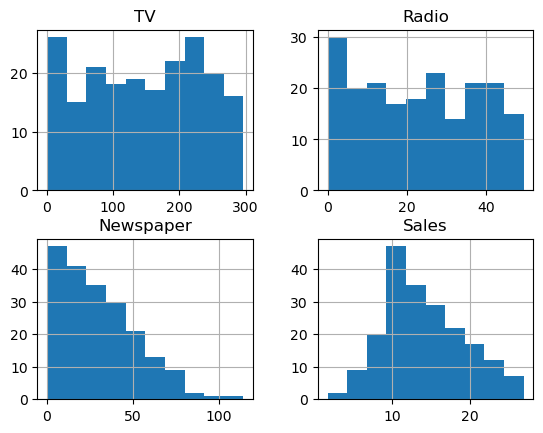

In [25]:
# Histograms of the Advertising data
adds.hist()
plt.show()

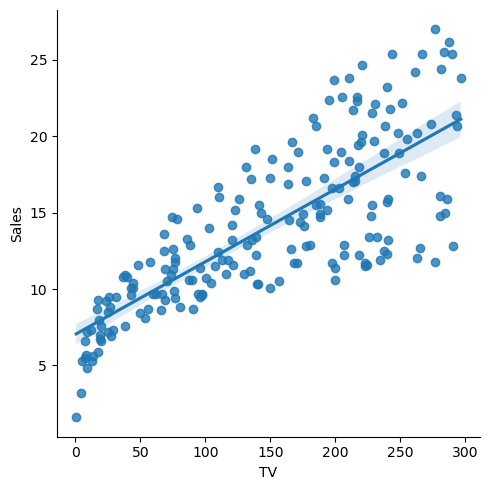

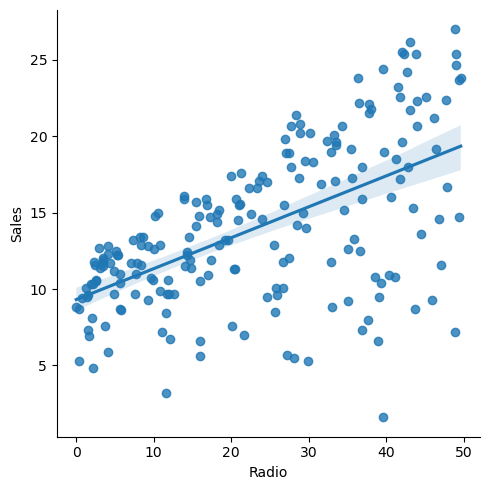

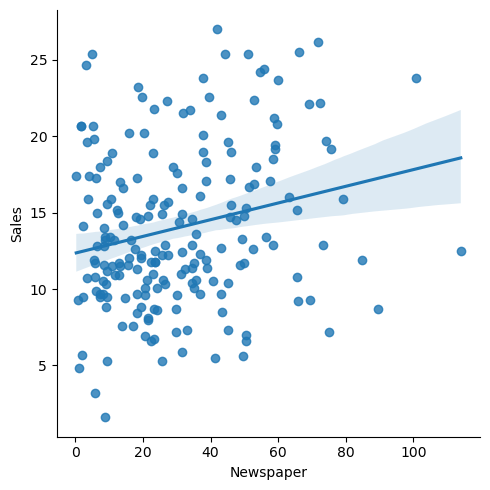

In [26]:
# linear regression plot similar to pair plot
sns.lmplot(x='TV', y='Sales', data=adds)
sns.lmplot(x='Radio', y='Sales', data=adds)
sns.lmplot(x='Newspaper', y='Sales', data=adds)
plt.tight_layout()
plt.show()

In [27]:
#statistical models of the data

model = sm.ols(formula = "Sales~TV+Radio+Newspaper",data=adds).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        01:20:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Drop sales
x=adds.drop('Sales',axis='columns')
y=adds['Sales']

In [30]:
# importing sklearn library for data model taining and model testing
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
# linear regression
modellinear=LinearRegression()
modellinear.fit(x_train,y_train)


LinearRegression()

In [33]:
y_pred=modellinear.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [34]:
print('MeanSquareError:',metrics.mean_squared_error(y_test,y_pred))
print('MeanAbsoluteError:',metrics.mean_absolute_error(y_pred,y_test))
print('RootMeanSquareError:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R-Squared',metrics.r2_score(y_pred,y_test))

MeanSquareError: 3.1740973539761046
MeanAbsoluteError: 1.4607567168117606
RootMeanSquareError: 1.7815996615334502
R-Squared 0.8791069137120033


In [35]:
print('Accuracy of the model: ', modellinear.score(x_test, y_test)*100)

Accuracy of the model:  89.9438024100912


In [36]:
modellinear.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [37]:
modellinear.intercept_

2.979067338122629

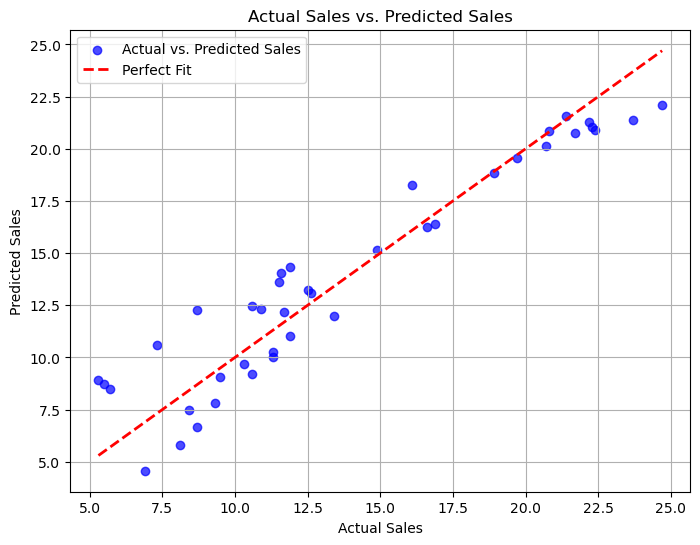

In [38]:
# actual vs prediction sales 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

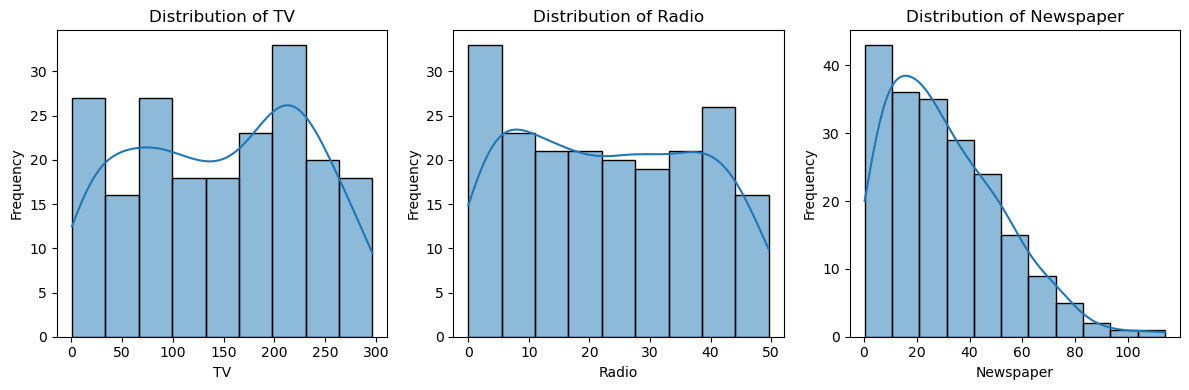

In [39]:
plt.figure(figsize=(12, 4))
for i, feature in enumerate(x.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(adds[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [40]:
#predicted values of linear Regression 
modellinear.predict(adds[['TV','Radio','Newspaper']])

array([20.61397147, 12.52942275, 12.62381325, 17.73087016, 13.27071976,
       12.82693587, 11.82149856, 12.09580733,  3.76381192, 12.46646769,
        7.09983872, 17.1342205 , 10.86633369,  8.79795773, 18.4598904 ,
       20.88988209, 13.25103464, 23.21214788, 10.00337695, 14.14222434,
       18.13614046, 14.62763575,  6.7146496 , 16.46055379,  8.20010235,
       15.4544819 , 14.94912051, 16.94141141, 19.29818677,  9.2767456 ,
       21.55384318, 11.42760282,  7.69340245, 18.6439566 ,  7.54498748,
       16.78110726, 23.2179245 , 15.7927809 , 10.0553326 , 20.39840652,
       16.34309555, 17.32216187, 21.35732668, 13.89573638,  9.08364737,
       15.15506967,  8.96290787, 21.61235394, 16.26867517,  8.2866632 ,
       12.59806415,  9.29612342, 20.65730881, 20.04956615, 20.22223086,
       21.3876709 ,  8.73628397, 12.74960716, 21.89621832, 18.01050913,
        5.80957448, 22.89655202, 16.69074263, 13.19615575, 17.0204516 ,
        7.82740305,  9.04831992, 11.98138077, 18.83109103, 21.05

In [41]:
# Predicting trend by line grgph through linear Regression,Ridge,Lasso
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 3.1740973539761046
R2 Score: 0.899438024100912
Cross-Validation R2: 0.8594884313276513


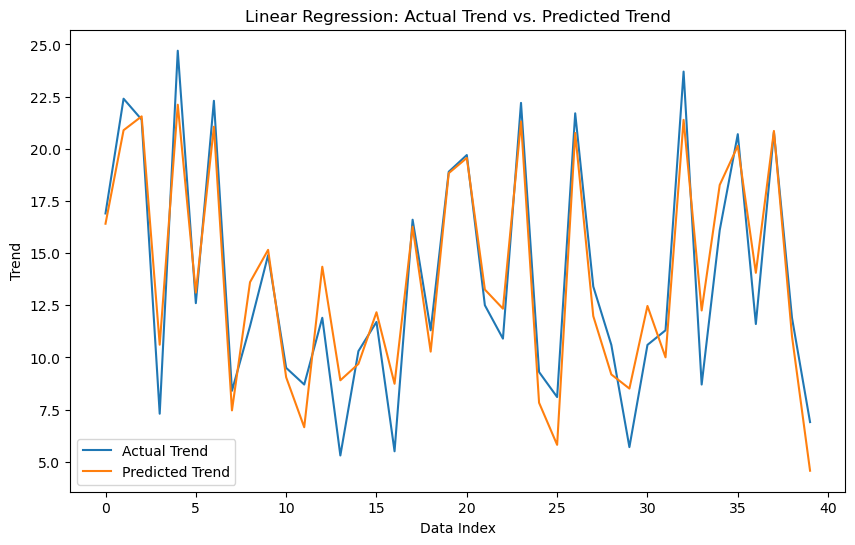

Ridge Regression
Mean Squared Error: 3.1740973539761046
R2 Score: 0.899438024100912
Cross-Validation R2: 0.8594899231332477


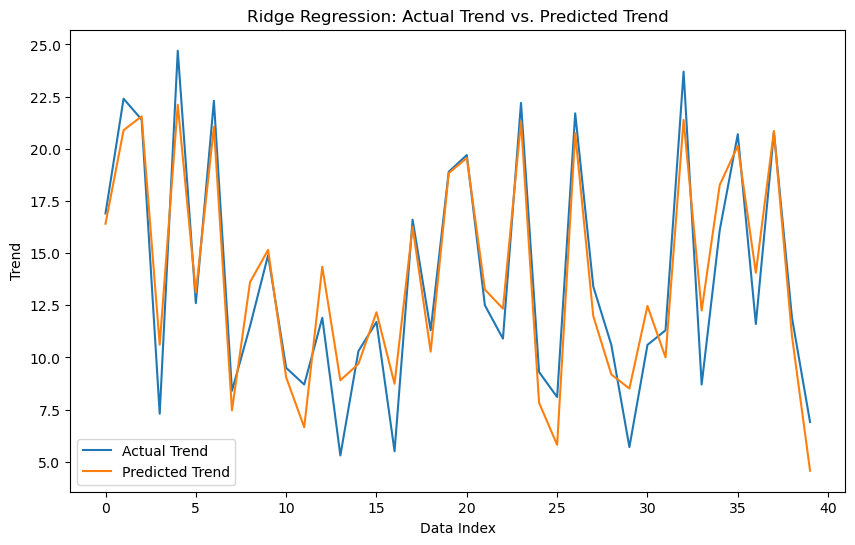

Lasso Regression
Mean Squared Error: 3.1740973539761046
R2 Score: 0.899438024100912
Cross-Validation R2: 0.8616987003497041


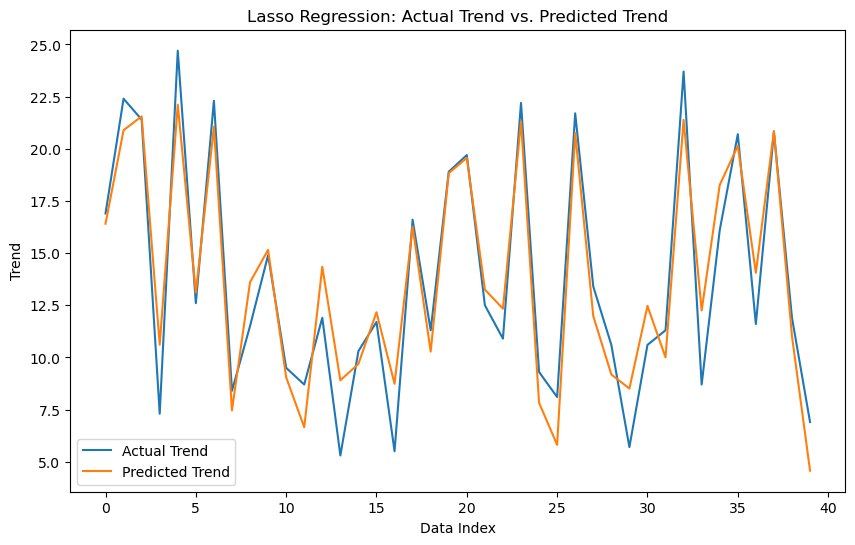

In [42]:
#Trend to the Advertising data
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = modellinear.predict(x_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    

In [43]:
#Decission tree regresor
modeltree = DecisionTreeRegressor(random_state=42)
modeltree.fit(x_train, y_train)

y_pred = modeltree.predict(x_test)

In [44]:
print('MeanSquareError:',metrics.mean_squared_error(y_test,y_pred))
print('MeanAbsoluteError:',metrics.mean_absolute_error(y_pred,y_test))
print('RootMeanSquareError:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R-Squared',metrics.r2_score(y_pred,y_test))

MeanSquareError: 2.175
MeanAbsoluteError: 0.9850000000000001
RootMeanSquareError: 1.4747881203752624
R-Squared 0.9329452766016975


In [45]:
print('Accuracy of the model: ', modeltree.score(x_test, y_test)*100)

Accuracy of the model:  93.10914968293179


In [46]:
#Random Forest
modelforest = RandomForestRegressor(random_state=42)
modelforest.fit(x_train, y_train)

y_pred = modelforest.predict(x_test)

In [47]:
print('MeanSquareError:',metrics.mean_squared_error(y_test,y_pred))
print('MeanAbsoluteError:',metrics.mean_absolute_error(y_pred,y_test))
print('RootMeanSquareError:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R-Squared',metrics.r2_score(y_pred,y_test))

MeanSquareError: 0.5907322499999988
MeanAbsoluteError: 0.6200999999999988
RootMeanSquareError: 0.7685910811348248
R-Squared 0.9800068326988904


In [48]:
print('Accuracy of the model: ', modelforest.score(x_test, y_test)*100)

Accuracy of the model:  98.12843792541844


# Sales Prediction of sample data set taken by given Advertising data set

In [49]:
# creating a data set
import random
random.seed(42) 
new_adds_data = adds[['TV', 'Radio', 'Newspaper']].sample(5)
new_adds_data

,TV,Radio,Newspaper
101,296.4,36.3,100.9
133,219.8,33.5,45.1
56,7.3,28.1,41.4
193,166.8,42.0,3.6
122,224.0,2.4,15.6


In [50]:
linear_regression_predictions = modellinear.predict(new_adds_data)
decission_tree_predictions = modeltree.predict(new_adds_data)
random_forest_predictions = modelforest.predict(new_adds_data)

In [51]:
new_adds_data['Total_Advertising_Spending'] = new_adds_data['TV'] + new_adds_data['Radio'] + new_adds_data['Newspaper']
new_adds_data

,TV,Radio,Newspaper,Total_Advertising_Spending
101,296.4,36.3,100.9,433.6
133,219.8,33.5,45.1,298.4
56,7.3,28.1,41.4,76.8
193,166.8,42.0,3.6,212.4
122,224.0,2.4,15.6,242.0


In [52]:
#difference between original and predicted of different models
new_adds_data['Original Value'] = adds.loc[new_adds_data.index, 'Sales']

Sales_prediction_table = pd.DataFrame({
    'Original Value': new_adds_data['Original Value'],
    'Linear Regression Prediction': linear_regression_predictions,
    'Decision Tree Prediction': decission_tree_predictions,
    'Random Forest Prediction': random_forest_predictions})

In [53]:
Sales_prediction_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction
101,23.8,23.383273,23.8,23.399
133,19.6,19.273176,19.6,19.713
56,5.5,8.736284,6.6,6.490
193,19.6,18.396083,19.6,19.134
122,11.6,13.495621,11.6,11.685


Inference:

to the given adverising data of sales of TV,Radio,Newspaper

the best model to fit is random forest

by training a model predicting the sales of the data set  obdserve that random forest has nearer valu of prediction and accuracy of test.